In [1]:
import math
import xarray as xr
import cartopy.crs as ccrs
import matplotlib as mpl
from matplotlib import pyplot as plt 
import matplotlib.path as mpath
import numpy as np
import cartopy.feature as cfeature
import traceback
from PIL import Image

In [2]:
oct2_2018 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2018_10_02_L2W.nc')
oct7_2018 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2018_10_07_L2W.nc')

july7_2018 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/L8_OLI_2018_07_21_21_41_08_074010_L2W.nc')
july30_2018 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/L8_OLI_2018_07_30_21_35_02_073010_L2W.nc')

sept30_2018 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/L8_OLI_2018_09_30_21_47_50_075010_L2W.nc')

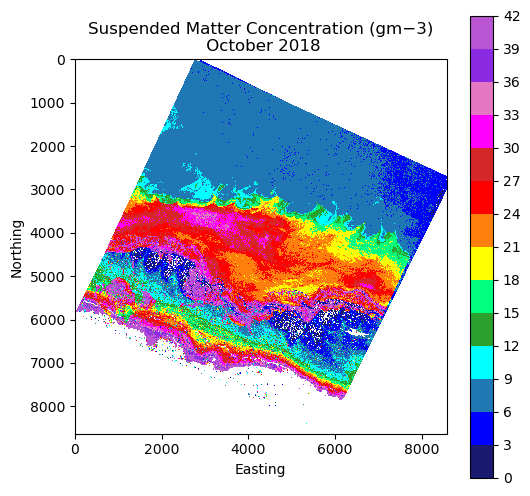

In [6]:

plt.figure(figsize=(6, 6))
# make a color map of fixed colors
#cmap = mpl.colors.ListedColormap(['midnightblue', 'blue','tab:blue','cyan','tab:green','springgreen','yellow', 'tab:orange', 'red', 'tab:pink', 'darkorchid'])
#bounds=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.4, 4, 4.5, 5, 5.5]
cmap = mpl.colors.ListedColormap(['midnightblue', 'blue','tab:blue','cyan','tab:green','springgreen','yellow', 'tab:orange', 'red', 'tab:red', 'fuchsia','tab:pink', 'blueviolet', 'mediumorchid'])
bounds=[0, 3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0, 27.0, 30.0, 33.0, 36.0, 39.0, 42.0]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


#img = plt.imshow(july7_2018.SPM_Nechad2016_655, interpolation='none',
#                   cmap = cmap, norm=norm)
#img = plt.imshow(july30_2018.SPM_Nechad2016_655, interpolation='none',
#                    cmap = cmap, norm=norm)

#img = plt.imshow(sept30_2018.SPM_Nechad2016_655, interpolation='none',
#                    cmap = cmap, norm=norm)

img = plt.imshow(oct2_2018.SPM_Nechad2016_655, interpolation='none',
                   cmap = cmap, norm=norm)
img = plt.imshow(oct7_2018.SPM_Nechad2016_655, interpolation='none',
                    cmap = cmap, norm=norm)


# make a color bar
plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=[0, 3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0, 27.0, 30.0, 33.0, 36.0, 39.0, 42.0])
plt.xlabel("Easting")
plt.ylabel("Northing")
#plt.title("Chlorophyll Concentration (µg/l) October 2022\n (3 bands)")
plt.title("Suspended Matter Concentration (gm−3)\n October 2018")
plt.show()

In [3]:
#print(sept30_2018.chl_oc2.shape)
print('July 7 2018', july7_2018.chl_oc2.shape)
print('July 30 2018: ', july30_2018.chl_oc2.shape)
print('Oct 2 2018:', oct2_2018.chl_oc2.shape)
print('Oct 7 2018:', oct7_2018.chl_oc2.shape)

July 7 2018 (8761, 8731)
July 30 2018:  (8701, 8651)
Oct 2 2018: (8701, 8651)
Oct 7 2018: (8631, 8581)


In [4]:

lat_09_30_18 = sept30_2018.lat.values
lon_09_30_18 = sept30_2018.lon.values
c2_09_30_18 = sept30_2018.chl_oc2.values
#(8841, 8791)

lat_07_07_18 = july7_2018.lat.values
lon_07_07_18 = july7_2018.lon.values
c2_07_07_18 = july7_2018.chl_oc2.values
#(8761, 8731)

lat_07_30_18 = july30_2018.lat.values
lon_07_30_18 = july30_2018.lon.values
c2_07_30_18 = july30_2018.chl_oc2.values
#(8701, 8651)

lat_10_02_18 = oct2_2018.lat.values
lon_10_02_18 = oct2_2018.lon.values
c2_10_02_18 = oct2_2018.chl_oc2.values
# (8701, 8651)

lat_10_07_18 = oct7_2018.lat.values
lon_10_07_18 = oct7_2018.lon.values
c2_10_07_18 = oct7_2018.chl_oc2.values
#(8631, 8581)

In [5]:
new_chl2_09_30_18 = np.zeros((len(lat_09_30_18), len(lon_09_30_18)))
new_chl2_09_30_18 [:]=np.nan

new_chl2_07_07_18 = np.zeros((len(lat_07_07_18), len(lon_07_07_18)))
new_chl2_07_07_18 [:]=np.nan
new_chl2_07_30_18 = np.zeros((len(lat_07_30_18), len(lon_07_30_18)))
new_chl2_07_30_18 [:]=np.nan

new_chl2_10_02_18 = np.zeros((len(lat_10_02_18), len(lon_10_02_18)))
new_chl2_10_02_18 [:]=np.nan
new_chl2_10_07_18 = np.zeros((len(lat_10_07_18), len(lon_10_07_18)))
new_chl2_10_07_18 [:]=np.nan

In [6]:

for x in range(0,8761):
    for y in range(0,8731):
            if c2_07_07_18[x,y] <= 5.49:
                new_chl2_07_07_18[x,y] = c2_07_07_18[x,y]

chl2_07_07_18 = np.nanmean(new_chl2_07_07_18)
print(chl2_07_07_18)

for x in range(0,8701):
    for y in range(0,8651):
            if c2_07_30_18[x,y] <= 5.49:
                new_chl2_07_30_18[x,y] = c2_07_30_18[x,y]

chl2_07_30_18 = np.nanmean(new_chl2_07_30_18)
print(chl2_07_30_18)


for x in range(0,8701):
    for y in range(0, 8651):
            if c2_10_02_18[x,y] <= 5.49:
                new_chl2_10_02_18[x,y] = c2_10_02_18[x,y]

chl2_10_02_18 = np.nanmean(new_chl2_10_02_18)
print(chl2_10_02_18)   

for x in range(0,8631):
    for y in range(0, 8581):
            if c2_10_07_18[x,y] <= 5.49:
                new_chl2_10_07_18[x,y] = c2_10_07_18[x,y]

chl2_10_07_18 = np.nanmean(new_chl2_10_07_18)
print(chl2_10_07_18)   

for x in range(0,8841):
    for y in range(0, 8791):
            if c2_09_30_18[x,y] <= 5.49:
                new_chl2_09_30_18[x,y] = c2_09_30_18[x,y]
chl2_09_30_18 = np.nanmean(new_chl2_09_30_18)
print(chl2_09_30_18) 

2.8896646081104014
1.9581653369815049
1.229400422362931
1.4416686521019666
1.5093047907276025


In [7]:
chl2_07_07_18 = np.nanmean(new_chl2_07_07_18) ###
chl2_09_30_18 = np.nanmean(new_chl2_09_30_18) ###
chl2_07_30_18 = np.nanmean(new_chl2_07_30_18) ##
chl2_10_02_18 = np.nanmean(new_chl2_10_02_18) 
chl2_10_07_18 = np.nanmean(new_chl2_10_07_18)

In [8]:

chl2_jul18_mean = (chl2_07_07_18 + chl2_07_30_18 ) /2
print('chl2_July2018 mean:', chl2_jul18_mean)

chl2_sept18_mean = chl2_09_30_18
print('chl2_Spet2018 mean:', chl2_sept18_mean)

chl2_oct18_mean = (chl2_10_02_18 + chl2_10_07_18) / 2
print('chl2_Oct2018 mean:', chl2_oct18_mean)


chl2_July2018 mean: 2.423914972545953
chl2_Spet2018 mean: 1.5093047907276025
chl2_Oct2018 mean: 1.3355345372324487


In [9]:
chl3_07_07_18 = np.nanmean(july7_2018.chl_oc3) ###
chl3_07_30_18 = np.nanmean(july30_2018.chl_oc3) ###
chl3_09_30_18 = np.nanmean(sept30_2018.chl_oc3) ###
chl3_10_02_18 = np.nanmean(oct2_2018.chl_oc3) 
chl3_10_07_18 = np.nanmean(oct7_2018.chl_oc3)

In [10]:
chl3_jul18_mean = (chl3_07_07_18 + chl3_07_30_18) / 2
print('chl3_July2018 mean:', chl3_jul18_mean)

chl3_sept18_mean = chl3_09_30_18 
print('chl3_Spet2018 mean:', chl3_sept18_mean)

chl3_oct18_mean = (chl3_10_02_18 + chl3_10_07_18) / 2
print('chl3_Oct2018 mean:', chl3_oct18_mean)

chl3_July2018 mean: 2.854999303817749
chl3_Spet2018 mean: 1.6732799
chl3_Oct2018 mean: 1.4130065441131592


In [13]:
spm_07_07_18 = np.nanmean(july7_2018.SPM_Nechad2016_655) ###
spm_07_30_18 = np.nanmean(july30_2018.SPM_Nechad2016_655) ###
spm_09_30_18 = np.nanmean(sept30_2018.SPM_Nechad2016_655) ###
spm_10_02_18 = np.nanmean(oct2_2018.SPM_Nechad2016_655) 
spm_10_07_18 = np.nanmean(oct7_2018.SPM_Nechad2016_655)

In [14]:
spm_jul18_mean = (spm_07_07_18 + spm_07_30_18) / 2
print('spm_July2018 mean:', spm_jul18_mean)

spm_sept18_mean = spm_09_30_18 
print('spm_Sept2018 mean:', spm_sept18_mean)

spm_oct18_mean = (spm_10_02_18 + spm_10_07_18) / 2
print('spm_Oct2018 mean:', spm_oct18_mean)

spm_July2018 mean: 23.66702651977539
spm_Sept2018 mean: 9.808562
spm_Oct2018 mean: 11.822543144226074
